# Solving the 1D Heat Equation

Let us consider the heat equation

$$ \frac{\partial u}{\partial t}(x,t) = \lambda \frac{\partial^2 u}{\partial x^2}(x,t)$$

for $x\in [0,L]$ and $t>0$ with boundary conditions:

$$ u(x,0) = sin(\pi x/L) $$
$$ u(0,t) = u(L,t) = 0$$

## Solving the PDE

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
L = 1.0
T = 10.0
alpha = 0.01
N = 50
dx = L / N
dt = 0.0005
dPrint = 0.1
steps = int(T / dt)

# Grid
x = np.linspace(0, L, N+1)
u = np.sin(np.pi * x/L)  # initial condition
u[0] = 0       # Dirichlet BCs
u[-1] = 1

# Store solutions at different time steps for animation
u_history = [u.copy()]

# Time stepping
t = 0
tPrint = dPrint
for _ in range(steps):
    u_new = u.copy()
    for i in range(1, N):
        u_new[i] = u[i] + alpha * dt / dx**2 * (u[i+1] - 2*u[i] + u[i-1])
    u = u_new
    t = t + dt
    if(t>=tPrint):
        u_history.append(u.copy())
        tPrint = tPrint + dPrint

## Creating an Animation

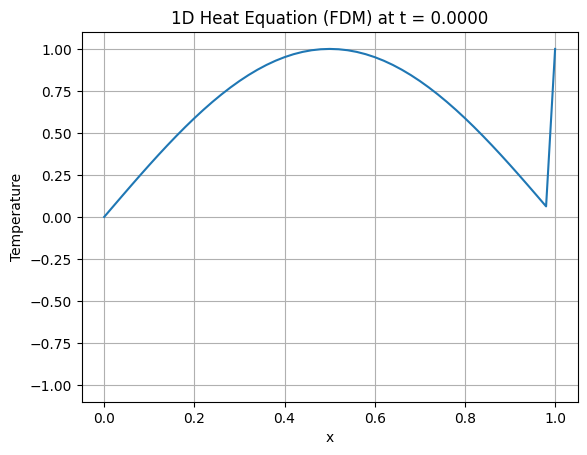

In [8]:
# Create the animation
fig, ax = plt.subplots()
line, = ax.plot(x, u_history[0])
ax.set_xlabel('x')
ax.set_ylabel('Temperature')
ax.set_title('1D Heat Equation (FDM)')
ax.set_ylim(-1.1, 1.1) # Adjust ylim based on expected temperature range
ax.grid(True)

def update(frame):
    line.set_ydata(u_history[frame])
    ax.set_title('1D Heat Equation (FDM) at t = {:.4f}'.format(frame * dPrint))
    return line,

ani = FuncAnimation(fig, update, frames=len(u_history), blit=True, interval=20)

In [9]:
# Displaying the animation
from IPython.display import HTML
HTML(ani.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.